<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 154.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 165.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.2 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

### Step 2: Import necessary libraries and load the dataset


In [8]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


### Load the data


In [9]:
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)

### Display the first few rows of the data to understand its structure


In [10]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



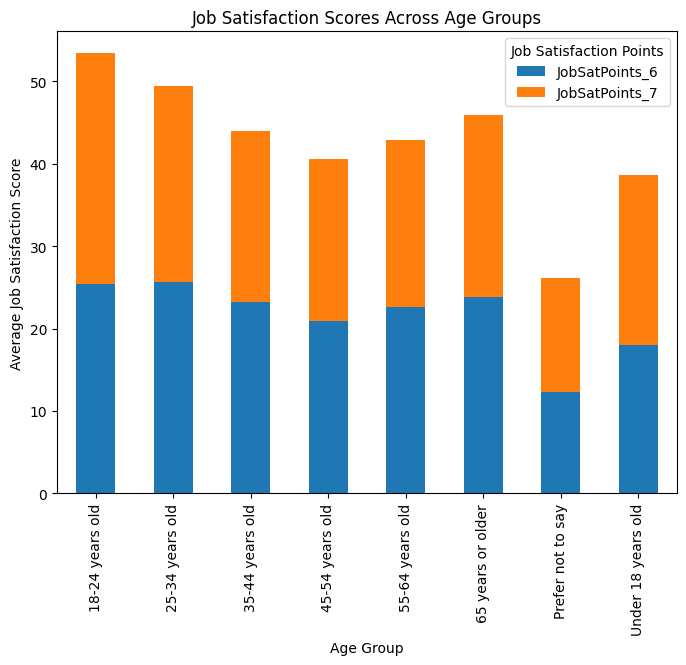

,Age,JobSatPoints_6,JobSatPoints_7
0,18-24 years old,25.465361,27.942308
1,25-34 years old,25.666562,23.719651
2,35-44 years old,23.264173,20.770169
3,45-54 years old,20.870773,19.679277
4,55-64 years old,22.581301,20.363821
5,65 years or older,23.798319,22.142857
6,Prefer not to say,12.294118,13.862745
7,Under 18 years old,18.052632,20.565789


In [12]:
##Write your code here
df_sat_age = df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']]
df_sat_age = df_sat_age.dropna()
df_groups = df_sat_age.groupby('Age').mean().reset_index()
df_groups.plot(kind='bar', x='Age', stacked=True, figsize = (8,6))
plt.title('Job Satisfaction Scores Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Job Satisfaction Score')
plt.legend(title='Job Satisfaction Points')
plt.show()
df_groups

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


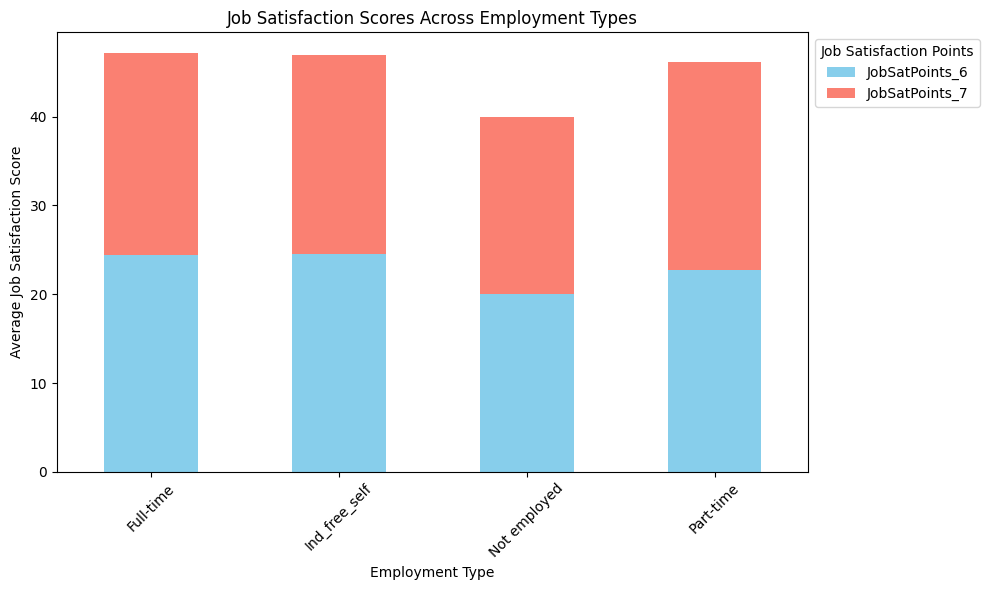

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract relevant columns and drop rows with missing values
df_jobsat_emp = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].dropna()

# Step 2: Define conflicting employment groups that should not co-occur
conflict = [
    {'Employed, full-time', 'Employed, part-time', 'Retired', 
     'Not employed, but looking for work', 'Not employed, and not looking for work', 
     'Independent contractor, freelancer, or self-employed'},
    {'Student, full-time', 'Student, part-time', 'Retired', 
     'Not employed, but looking for work', 'Not employed, and not looking for work'}
]

# Step 3: Function to check if an Employment entry has conflicting categories
def has_conflict(entry):
    parts = set(map(str.strip, entry.split(';')))
    for group in conflict:
        if len(parts.intersection(group)) > 1:
            return True
    return False

# Step 4: Filter out rows with conflicting Employment statuses
df_jobsat_emp_clean = df_jobsat_emp[~df_jobsat_emp['Employment'].apply(has_conflict)].copy()

# Step 5: Simplify employment categories to broader groups
def simplify_emp(entry):
    if "Employed, full-time" in entry:
        return "Full-time"
    elif "Employed, part-time" in entry:
        return "Part-time"
    elif "Not employed" in entry:
        return "Not employed"
    elif "freelancer" in entry or "Independent contractor" in entry:
        return "Ind_free_self"
    elif "Retired" in entry:
        return "Retired"
    else:
        return "Other"

df_jobsat_emp_clean['Employment_simple'] = df_jobsat_emp_clean['Employment'].apply(simplify_emp)

# Step 6: Group by simplified employment type and calculate average job satisfaction
df_grouped = df_jobsat_emp_clean.groupby('Employment_simple')[['JobSatPoints_6', 'JobSatPoints_7']].mean().reset_index()

# Step 7: Plot stacked bar chart
df_grouped.plot(
    kind='bar', 
    x='Employment_simple', 
    stacked=True, 
    figsize=(10,6), 
    color=['skyblue', 'salmon']
)

plt.title('Job Satisfaction Scores Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Average Job Satisfaction Score')
plt.legend(title='Job Satisfaction Points', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


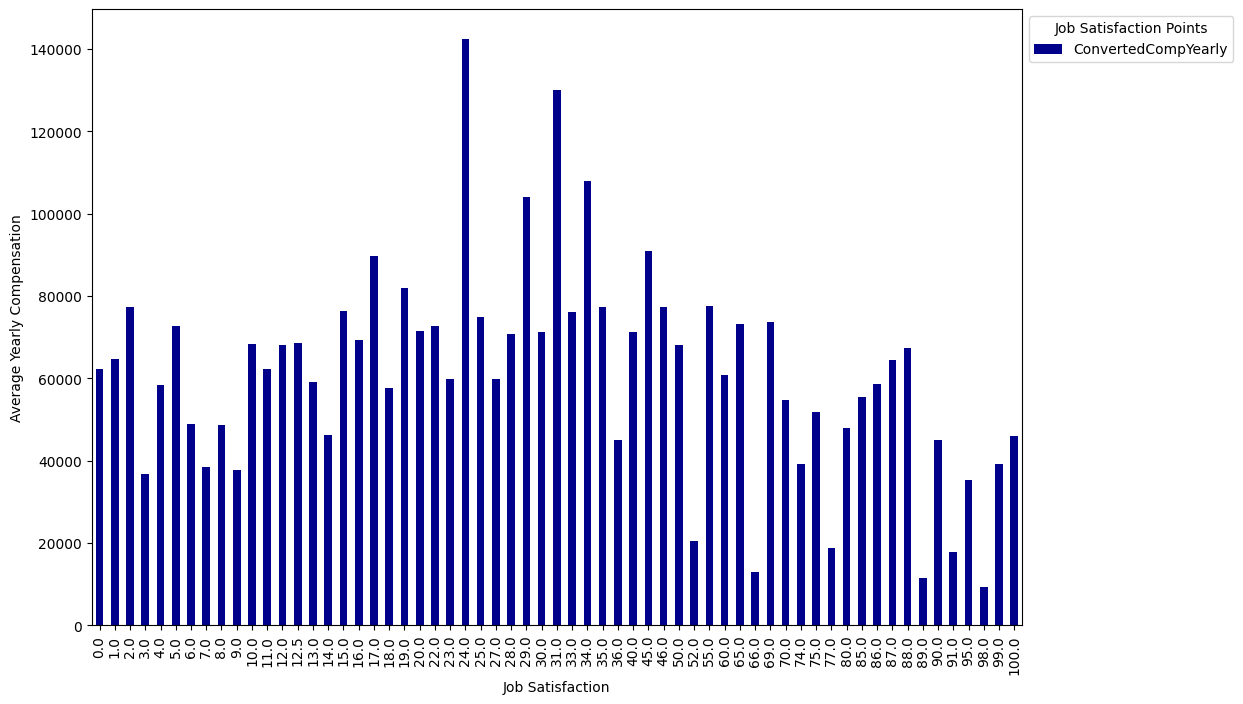

In [19]:
##Write your code here
df_comp_sat = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']]
df_comp_sat = df_comp_sat.dropna()
Q1 = df_comp_sat['ConvertedCompYearly'].quantile(0.25)
Q3 = df_comp_sat['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + IQR*1.5
lower_bound = Q1 - IQR*1.5
df_comp_sat= df_comp_sat[(df_comp_sat['ConvertedCompYearly']<=upper_bound) & (df_comp_sat['ConvertedCompYearly']>=lower_bound)]
filter_df = df_comp_sat[(df_comp_sat['Age'] =='25-34 years old')]
group_df = filter_df.groupby('JobSatPoints_6')['ConvertedCompYearly'].mean().reset_index()
group_df.plot(kind='bar', x='JobSatPoints_6', y='ConvertedCompYearly', color='darkblue', figsize = (12,8))
plt.xlabel('Job Satisfaction')
plt.ylabel('Average Yearly Compensation')
plt.legend(title='Job Satisfaction Points', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [34]:
##Write your code here
group_df01 = df_comp_sat.groupby('Age').median().reset_index()
group_df01

,Age,ConvertedCompYearly,JobSatPoints_6
0,18-24 years old,25401.0,20.0
1,25-34 years old,58154.0,20.0
2,35-44 years old,80555.0,20.0
3,45-54 years old,95592.0,20.0
4,55-64 years old,109019.5,20.0
5,65 years or older,115000.0,22.5
6,Prefer not to say,126047.0,10.0
7,Under 18 years old,8661.0,10.0


<Axes: xlabel='Age'>

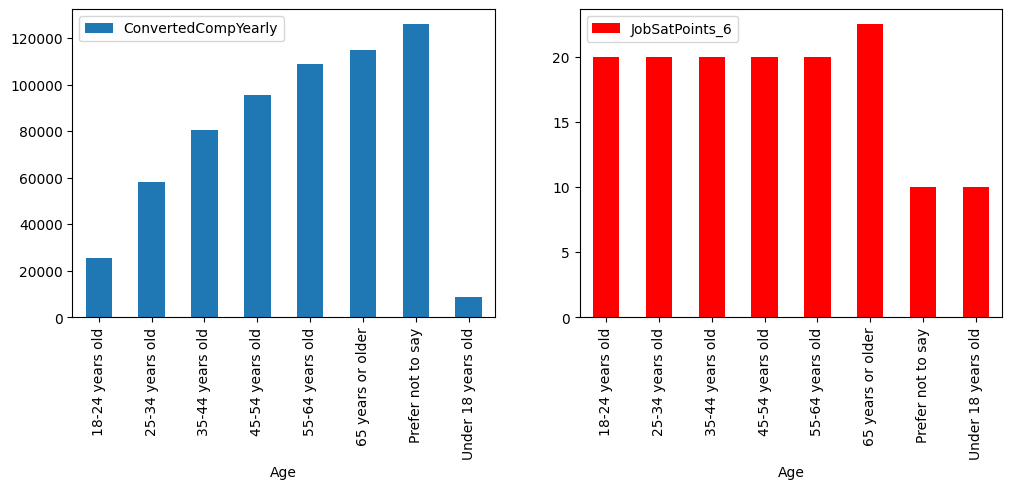

In [35]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
group_df01.plot(kind = 'bar', x='Age', y = 'ConvertedCompYearly', figsize = (12, 4), ax = ax0)
group_df01.plot(kind = 'bar', x='Age', y='JobSatPoints_6', color = 'red', figsize = (12, 4), ax = ax1)

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


Note: you may need to restart the kernel to use updated packages.


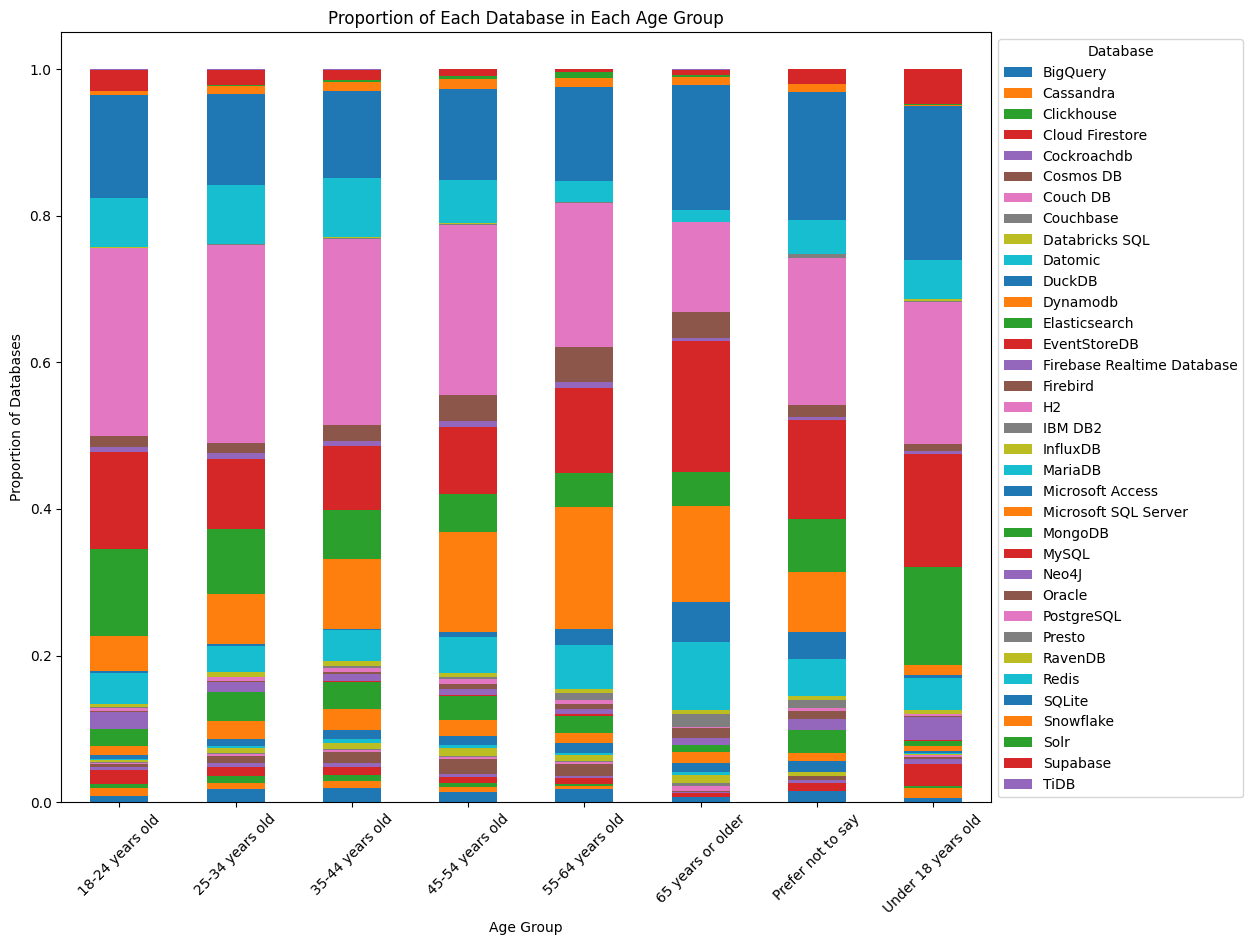

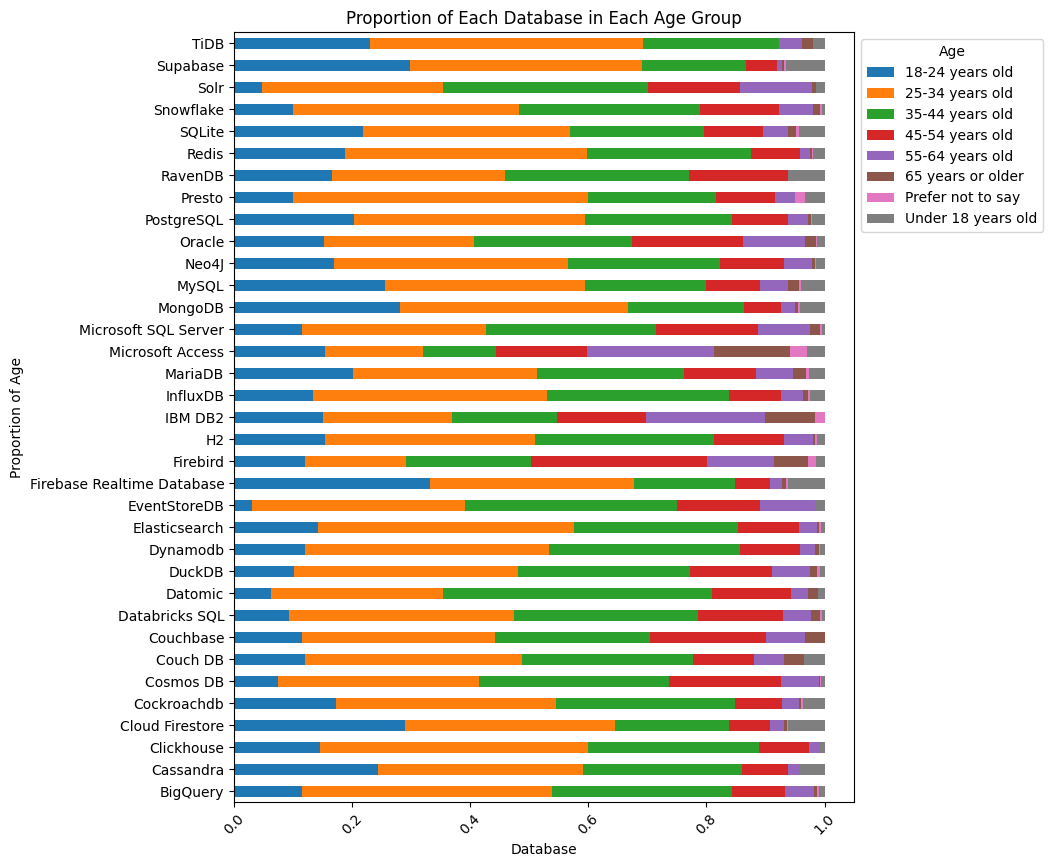

In [24]:
##Write your code here
df_dbw_age = df[['DatabaseWantToWorkWith', 'Age']]
df_dbw_age = df_dbw_age.dropna()
df_dbw_age['db_counts'] = df_dbw_age['DatabaseWantToWorkWith'].str.split(';').str.len()
df_dbw_age = df_dbw_age[df_dbw_age['db_counts']<=3]
df_dbw_age
df_dbw_age['DatabaseWantToWorkWith'] = df_dbw_age['DatabaseWantToWorkWith'].str.split(';')
df_dbw_age = df_dbw_age.explode('DatabaseWantToWorkWith')
df_dbw_age
%pip install mplcursors
import mplcursors
# Count occurrences of each database in each age group
database_counts = df_dbw_age.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)
database_counts
# Calculate proportions
database_proportions = database_counts.div(database_counts.sum(axis=1), axis=0)

# Create a stacked bar chart
database_proportions.plot(kind='bar', stacked=True, figsize = (12, 10))
# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Proportion of Databases')
plt.title('Proportion of Each Database in Each Age Group')
plt.legend(title='Database', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
mplcursors.cursor(hover=True)
# Show the plot
plt.show()

# Count occurrences of each database in each age group
database_counts2 = df_dbw_age.groupby(['DatabaseWantToWorkWith', 'Age']).size().unstack(fill_value=0)

# Calculate proportions
database_proportions2 = database_counts2.div(database_counts2.sum(axis=1), axis=0)

# Create a stacked bar chart
database_proportions2.plot(kind='barh', stacked=True, figsize = (8, 10))

# Adding labels and title
plt.xlabel('Database')
plt.ylabel('Proportion of Age')
plt.title('Proportion of Each Database in Each Age Group')
plt.legend(title='Age', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


<Axes: xlabel='JobSat'>

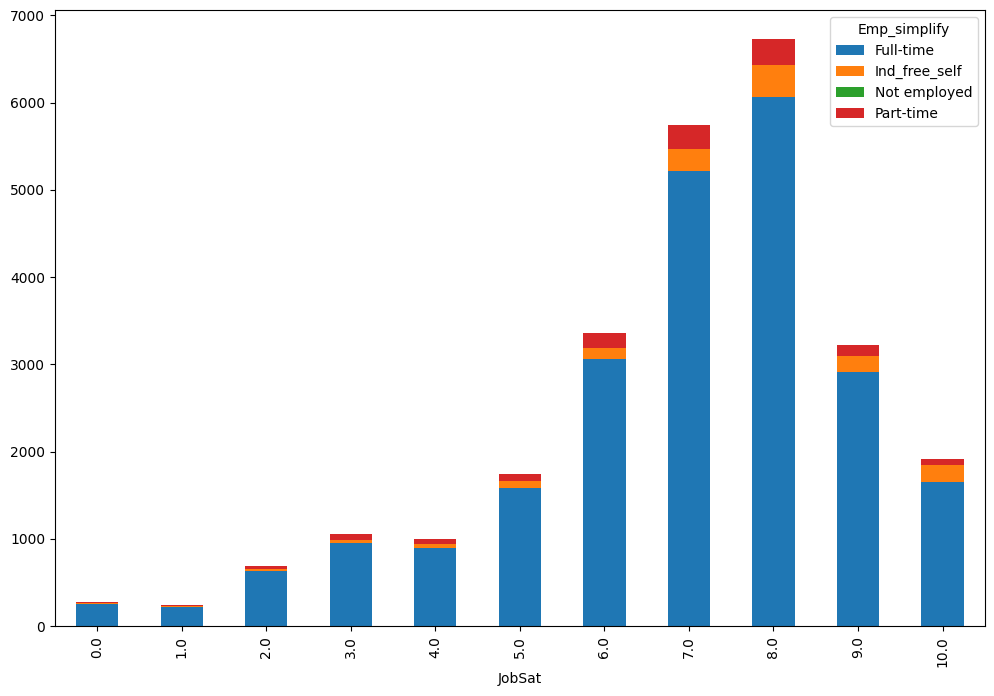

In [25]:
##Write your code here
df_emp_sat = df[['Employment', 'JobSat']]
df_emp_sat = df_emp_sat.dropna()
conflict_groups = [{'Employed, full-time', 
                    'Employed, part-time', 
                    'Retired', 
                    'Not employed, but looking for work', 
                    'Not employed, and not looking for work',
                    'Independent contractor, freelancer, or self-employed'},
                   {'Student, full-time',
                    'Student, part-time',
                    'Retired',
                    'Not employed, but looking for work',
                    'Not employed, and not looking for work'}]
def has_conflict(entry):
    part = set(map(str.strip, entry.split(';')))
    for group in conflict_groups:
        if len(part.intersection(group))>1:
            return True
    return False
df_emp_sat = df_emp_sat[~df_emp_sat['Employment'].apply(has_conflict)]
def simplify_employment(entry):
    if 'Employed, full-time' in entry:
        return "Full-time"
    elif "Employed, part-time" in entry:
        return "Part-time"
    elif "Not employed" in entry:
        return "Not employed"
    elif "freelancer" in entry:
        return "Ind_free_self"
    elif "Retired" in entry:
        return "Retired"
    else:
        return "Other"
df_emp_sat['Emp_simplify'] =df_emp_sat['Employment'].apply(simplify_employment)
group_sat_emp = df_emp_sat.groupby(['JobSat', 'Emp_simplify']).size().unstack(fill_value=0)
group_sat_emp.plot(kind='bar', stacked = True, figsize = (12,8))

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [26]:
##Write your code here
df_la_age = df[['LanguageAdmired', 'Age']]
df_la_age = df_la_age.dropna()
df_la_age['la_counts'] = df_la_age['LanguageAdmired'].str.split(';').str.len()
df_la_age = df_la_age[df_la_age['la_counts']<=3]
df_la_age['LanguageAdmired'] = df_la_age['LanguageAdmired'].str.split(';')
df_la_age = df_la_age.explode('LanguageAdmired')
group_la_age = df_la_age.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='counts')
top_la = group_la_age.sort_values(['Age', 'counts'], ascending = False).groupby('Age').head()
top_la

,Age,LanguageAdmired,counts
339,Under 18 years old,Python,395
326,Under 18 years old,HTML/CSS,243
329,Under 18 years old,JavaScript,213
316,Under 18 years old,C++,179
342,Under 18 years old,Rust,146
300,Prefer not to say,Python,45
285,Prefer not to say,C++,23
282,Prefer not to say,Bash/Shell (all shells),19
283,Prefer not to say,C,18
293,Prefer not to say,JavaScript,17


In [27]:
top_la_group = top_la.groupby(['Age', 'LanguageAdmired','counts']).size().reset_index()
pivot_data = top_la_group.pivot(index='Age', columns='LanguageAdmired', values='counts').fillna(0)
pivot_data

LanguageAdmired,Bash/Shell (all shells),C,C#,C++,HTML/CSS,JavaScript,Python,Rust,SQL,TypeScript
Age,,,,,,,,,,
18-24 years old,0.0,0.0,0.0,0.0,855.0,1129.0,1730.0,0.0,801.0,831.0
25-34 years old,0.0,0.0,0.0,0.0,1679.0,2404.0,3269.0,0.0,2099.0,2213.0
35-44 years old,0.0,0.0,1078.0,0.0,0.0,1405.0,1824.0,0.0,1430.0,1206.0
45-54 years old,0.0,0.0,522.0,0.0,345.0,493.0,726.0,0.0,708.0,0.0
55-64 years old,136.0,0.0,219.0,0.0,0.0,183.0,304.0,0.0,335.0,0.0
65 years or older,0.0,0.0,43.0,50.0,0.0,42.0,90.0,0.0,61.0,0.0
Prefer not to say,19.0,18.0,0.0,23.0,0.0,17.0,45.0,0.0,0.0,0.0
Under 18 years old,0.0,0.0,0.0,179.0,243.0,213.0,395.0,146.0,0.0,0.0


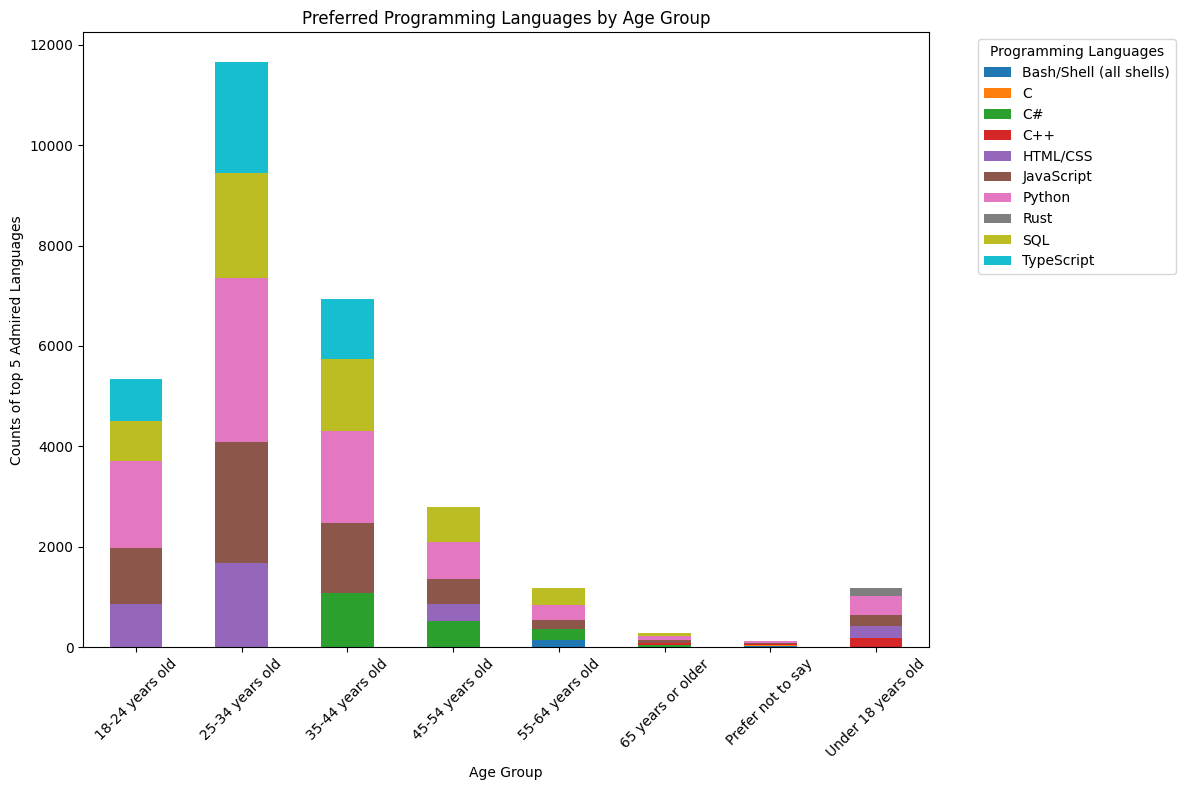

In [28]:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Counts of top 5 Admired Languages')
plt.title('Preferred Programming Languages by Age Group')
plt.legend(title='Programming Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [30]:
##Write your code here
df_pl_emp = df[['PlatformAdmired', 'Employment']]
df_pl_emp  = df_pl_emp.dropna()
df_pl_emp['Pl_counts'] = df_pl_emp['PlatformAdmired'].str.split(';').str.len()
df_pl_emp = df_pl_emp[df_pl_emp['Pl_counts']<=3]
conflict_groups = [{'Employed, full-time', 
                    'Employed, part-time', 
                    'Retired', 
                    'Not employed, but looking for work', 
                    'Not employed, and not looking for work',
                    'Independent contractor, freelancer, or self-employed'},
                   {'Student, full-time',
                    'Student, part-time',
                    'Retired',
                    'Not employed, but looking for work',
                    'Not employed, and not looking for work'}]
def has_conflict(entry):
    part = set(map(str.strip, entry.split(';')))
    for group in conflict_groups:
        if len(part.intersection(group))>1:
            return True
    return False
df_pl_emp = df_pl_emp[~df_pl_emp['Employment'].apply(has_conflict)]
def simplify_employment(entry):
    if 'Employed, full-time' in entry:
        return "Full-time"
    elif "Employed, part-time" in entry:
        return "Part-time"
    elif "Not employed" in entry:
        return "Not employed"
    elif "freelancer" in entry:
        return "Ind_free_self"
    elif "Retired" in entry:
        return "Retired"
    else:
        return "Other"
df_pl_emp['Emp_simplify'] = df_pl_emp['Employment'].apply(simplify_employment)
df_pl_emp02 = df_pl_emp[['PlatformAdmired', 'Emp_simplify']]
df_pl_emp02.loc[:, 'PlatformAdmired'] = df_pl_emp02['PlatformAdmired'].str.split(';')
df_pl_emp02 = df_pl_emp02.explode('PlatformAdmired')
df_pl_emp02

,PlatformAdmired,Emp_simplify
1,Amazon Web Services (AWS),Full-time
1,Heroku,Full-time
1,Netlify,Full-time
2,Google Cloud,Full-time
3,Amazon Web Services (AWS),Other
...,...,...
65401,Microsoft Azure,Full-time
65409,Google Cloud,Full-time
65409,Vercel,Full-time
65421,Amazon Web Services (AWS),Full-time


In [31]:
group_pl_emp = df_pl_emp02.groupby(['Emp_simplify', 'PlatformAdmired']).size().sort_values(ascending = False).reset_index(name='counts')
group_pl_emp

,Emp_simplify,PlatformAdmired,counts
0,Full-time,Amazon Web Services (AWS),8933
1,Full-time,Microsoft Azure,5050
2,Full-time,Google Cloud,3213
3,Full-time,Cloudflare,1777
4,Full-time,Firebase,1358
...,...,...,...
148,Retired,Supabase,2
149,Retired,VMware,2
150,Not employed,Scaleway,1
151,Retired,OVH,1


In [32]:
top_pl_emp = group_pl_emp.sort_values(['Emp_simplify','counts'], ascending = False).groupby('Emp_simplify').head()
top_pl_emp

,Emp_simplify,PlatformAdmired,counts
97,Retired,Google Cloud,20
101,Retired,Amazon Web Services (AWS),18
107,Retired,Microsoft Azure,16
117,Retired,Managed Hosting,8
130,Retired,Digital Ocean,5
26,Part-time,Amazon Web Services (AWS),295
35,Part-time,Microsoft Azure,197
36,Part-time,Google Cloud,181
38,Part-time,Cloudflare,151
44,Part-time,Vercel,125


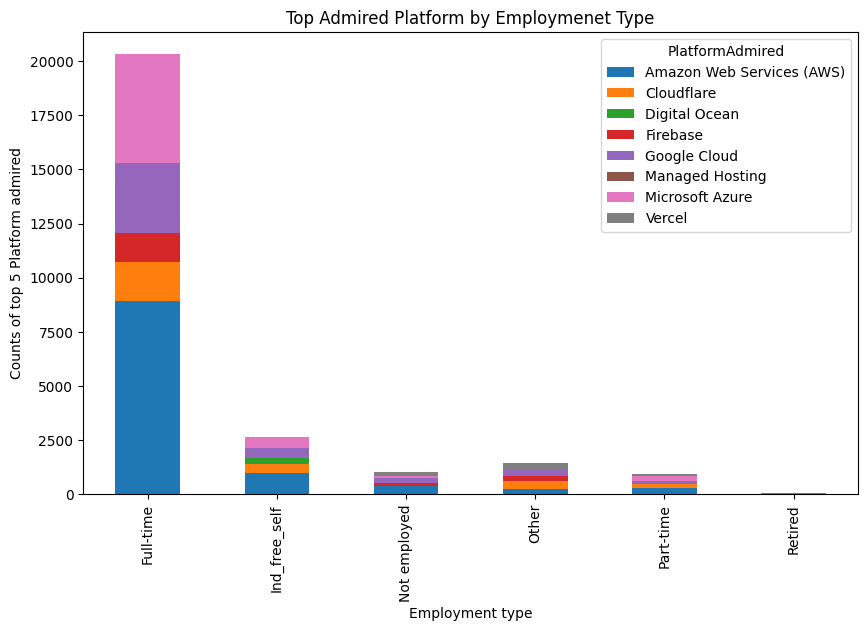

In [33]:
pivot_pl_emp = top_pl_emp.pivot(index = 'Emp_simplify', columns = 'PlatformAdmired', values='counts').fillna(0)
pivot_pl_emp.plot(kind='bar', stacked = True, figsize = (10, 6))
plt.title('Top Admired Platform by Employmenet Type')
plt.xlabel('Employment type')
plt.ylabel('Counts of top 5 Platform admired')
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
